<a href="https://colab.research.google.com/github/Norod/my-colab-experiments/blob/master/3D_Photo_Inpainting_args.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[CVPR 2020] 3D Photography using Context-aware Layered Depth Inpainting**

[project website](https://shihmengli.github.io/3D-Photo-Inpainting/)

* Based on the improvements by @Buntworthy 
* Colab updates by @Norod78


- **Prepare environment**


In [1]:

!pip3 install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install opencv-python==4.2.0.32
!pip3 install vispy==0.6.4
!pip3 install moviepy==1.0.2
!pip3 install transforms3d==0.3.1
!pip3 install networkx==2.3

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 24kB/s 
     |████████████████████████████████| 4.1MB 73.7MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 28.2MB 90kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 2.3MB 2.5MB/s 
     |████████████████████████████████| 890kB 21.8MB/s 
     |████████████████████████████████| 7.9MB 2.4MB/s 
     |████████████████████████████████| 3.3M

- **Download script and pretrained model**


In [2]:
cd /content/

/content


In [3]:
#!gdown https://drive.google.com/uc?id=1Jmiq1-hSIsHiq_GCcmiNXtrs_T62AY_z
!wget 'https://norod78.s3-eu-west-1.amazonaws.com/models/3d-photo-inpainting-master+(2).zip'
#!mv "/content/3d-photo-inpainting-master (2).zip" "/content/3d-photo-inpainting-master.zip"
!mv '/content/3d-photo-inpainting-master+(2).zip' '/content/3d-photo-inpainting-master.zip'

--2020-05-20 03:54:33--  https://norod78.s3-eu-west-1.amazonaws.com/models/3d-photo-inpainting-master+(2).zip
Resolving norod78.s3-eu-west-1.amazonaws.com (norod78.s3-eu-west-1.amazonaws.com)... 52.218.84.211
Connecting to norod78.s3-eu-west-1.amazonaws.com (norod78.s3-eu-west-1.amazonaws.com)|52.218.84.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464001543 (443M) [application/zip]
Saving to: ‘3d-photo-inpainting-master+(2).zip’

3d-photo-inpainting 100%[===================>] 442.51M  11.8MB/s    in 40s     

2020-05-20 03:55:15 (11.1 MB/s) - ‘3d-photo-inpainting-master+(2).zip’ saved [464001543/464001543]



In [4]:
!unzip 3d-photo-inpainting-master.zip

Archive:  3d-photo-inpainting-master.zip
   creating: 3d-photo-inpainting-master/
  inflating: 3d-photo-inpainting-master/LICENSE  
   creating: 3d-photo-inpainting-master/MiDaS/
  inflating: 3d-photo-inpainting-master/MiDaS/MiDaS_utils.py  
  inflating: 3d-photo-inpainting-master/MiDaS/monodepth_net.py  
  inflating: 3d-photo-inpainting-master/MiDaS/run.py  
  inflating: 3d-photo-inpainting-master/MiDaS/model.pt  
   creating: 3d-photo-inpainting-master/depth/
  inflating: 3d-photo-inpainting-master/depth/moon.npy  
   creating: 3d-photo-inpainting-master/image/
  inflating: 3d-photo-inpainting-master/image/moon.jpg  
  inflating: 3d-photo-inpainting-master/mesh_tools.py  
  inflating: 3d-photo-inpainting-master/networks.py  
   creating: 3d-photo-inpainting-master/misc/
  inflating: 3d-photo-inpainting-master/misc/moon_40.gif  
  inflating: 3d-photo-inpainting-master/README.md  
  inflating: 3d-photo-inpainting-master/main.py  
   creating: 3d-photo-inpainting-master/video/
   creati

In [0]:
rm 3d-photo-inpainting-master.zip

In [6]:
cd 3d-photo-inpainting-master

/content/3d-photo-inpainting-master


In [7]:
!pwd
!ls -latr ./checkpoints/

/content/3d-photo-inpainting-master
total 447844
-rw-r--r-- 1 root root  45974122 Apr  9 16:55 edge-model.pth
-rw-r--r-- 1 root root 206272258 Apr  9 16:55 depth-model.pth
-rw-r--r-- 1 root root 206331633 Apr  9 16:55 color-model.pth
drwxr-xr-x 2 root root      4096 Apr  9 19:42 .
drwxrwxr-x 8 root root      4096 Apr 10 00:19 ..


- **Please upload `.jpg` files to `/content/3d-photo-inpainting-master/image/`**

  - ![Figure](https://drive.google.com/uc?id=1HyLrIu16RTwP14mfYt4fcgREVs9VlU7R)



- **Execute the 3D Photo Inpainting**
  - Note: The 3D photo generation process usually takes about 2-3 minutes or more depending on the available computing resources.

In [0]:
%%sh
cat <<EOT >> argument.yml
depth_edge_model_ckpt: checkpoints/edge-model.pth
depth_feat_model_ckpt: checkpoints/depth-model.pth
rgb_feat_model_ckpt: checkpoints/color-model.pth
MiDaS_model_ckpt: MiDaS/model.pt
fps: 60
num_frames: 540 #240
x_shift_range: -0.03
y_shift_range: -0.00
z_shift_range: -0.07
specific: ''
longer_side_len: 960
src_folder: image
depth_folder: depth
mesh_folder: mesh
video_folder: video
load_ply: False
save_ply: False
inference_video: True
gpu_ids: 0
img_format: '.jpg'
depth_threshold: 2.4 #1.2 #0.04
ext_edge_threshold: 0.002
sparse_iter: 5
filter_size: [7, 7, 5, 5, 5]
sigma_s: 4.0
sigma_r: 0.5
redundant_number: 12
background_thickness: 180 #140 #70
context_thickness: 220 #180 # 140
background_thickness_2: 70
context_thickness_2: 70
discount_factor: 1.00
log_depth: True
largest_size: 1024 #512
depth_edge_dilate: 10
depth_edge_dilate_2: 5
extrapolate_border: True
extrapolation_thickness: 100 #80 #60
repeat_inpaint_edge: True
crop_border: False
EOT

In [9]:
!python main.py --config argument.yml

  0% 0/1 [00:00<?, ?it/s]Current Source ==>  moon
initialize
device: cpu
start processing
  processing image/moon.jpg (1/1)
torch.Size([1, 3, 384, 384])
finished
Start Running 3D_Photo ...
53.13010235415598
Moviepy - Building video video/moon_straight-line.mp4.
Moviepy - Writing video video/moon_straight-line.mp4

  0% 0/1 [02:53<?, ?it/s]
t:   0% 0/541 [00:00<?, ?it/s, now=None]
t:   2% 13/541 [00:00<00:04, 129.14it/s, now=None]
t:   5% 27/541 [00:00<00:03, 131.33it/s, now=None]
t:   8% 42/541 [00:00<00:03, 135.01it/s, now=None]
t:  10% 52/541 [00:00<00:07, 63.62it/s, now=None] 
t:  11% 60/541 [00:00<00:10, 44.98it/s, now=None]
t:  12% 66/541 [00:01<00:11, 40.06it/s, now=None]
t:  13% 72/541 [00:01<00:14, 33.15it/s, now=None]
t:  14% 77/541 [00:01<00:14, 32.30it/s, now=None]
t:  15% 81/541 [00:01<00:15, 28.99it/s, now=None]
t:  16% 85/541 [00:01<00:16, 27.93it/s, now=None]
t:  16% 89/541 [00:02<00:15, 28.99it/s, now=None]
t:  17% 93/541 [00:02<00:15, 28.15it/s, now=None]
t:  18% 97/54

- **The results are stored in the following directories**
  - Corresponding depth map estimated by [MiDaS](https://github.com/intel-isl/MiDaS.git) 
      - E.g. ```depth/moon.npy```
  - Inpainted 3D mesh
      - E.g. ```mesh/moon.ply```
  - Rendered videos with circular motion
      - E.g. ```mesh/moon.mp4```
    
    ![](https://drive.google.com/uc?id=1ovw4cX0R7Bn0WoC0JF42MW0nEx8mBPYG)

/content/3d-photo-inpainting-master/depth


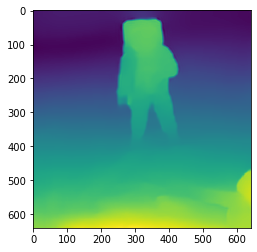

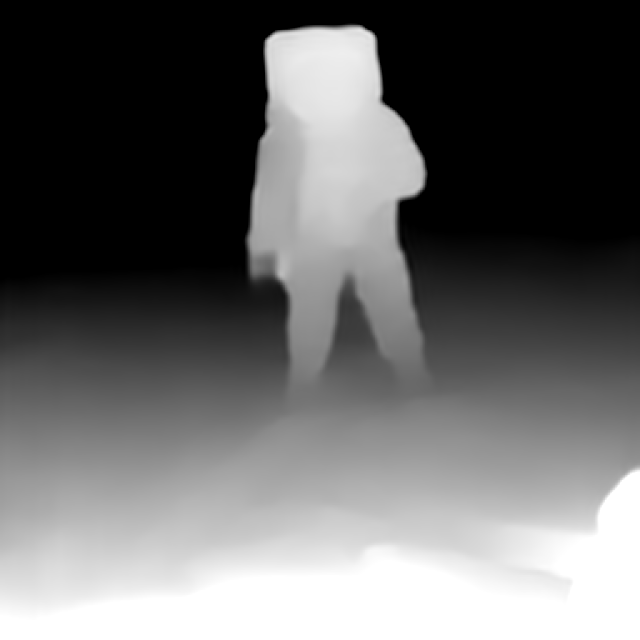

/content/3d-photo-inpainting-master


In [10]:
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import os

%cd /content/3d-photo-inpainting-master/depth

files = [i for i in os.listdir("./") if i.endswith("npy")]
for file in files:
  data = np.load(file)
  plt.imshow(data, interpolation='nearest')
  plt.savefig(file+str('-fig-depth.jpg'),bbox_inches='tight')
  plt.show()  
  img = Image.fromarray(255.0*data).convert('RGB')
  display(img)
  img.save(file+str('-depth.jpg'))
  img = Image.fromarray(255.0*(1.0-data)).convert('RGB')
  img.save(file+str('-inverse-depth.jpg'))

%cd /content/3d-photo-inpainting-master

In [11]:
!zip ./depth-maps.zip ./depth/*.jpg

  adding: depth/moon.npy-depth.jpg (deflated 39%)
  adding: depth/moon.npy-fig-depth.jpg (deflated 4%)
  adding: depth/moon.npy-inverse-depth.jpg (deflated 39%)
